In [2]:
import graphlab
import numpy as np
import matplotlib.pyplot as plt
from math import pow
%matplotlib inline

[WARNING] graphlab.product_key: Unable to write current GraphLab Create license to /Users/gabrielfior/.graphlab/config. Ensure that this user account                         has write permission to /Users/gabrielfior/.graphlab/config to save the license for offline use.
[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1474304360.log
INFO:graphlab.cython.cy_server:GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1474304360.log
[WARNING] graphlab.deploy._session: Unable to create session in specified location: '/Users/gabrielfior/.graphlab/artifacts'. Using: '/var/tmp/graphlab-gabrielfior/8845/tmp_session_c7b5b34c-bb87-4926-b490-5f446c87503c'


This non-commercial license of GraphLab Create for academic use is assigned to ga46mal@mytum.de and will expire on July 08, 2017.


/Users/gabrielfior/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
loading=True #Set True to load full csv file
full_csv_path = '/Users/gabrielfior/data_mpp2/400GeV_15steps_full.csv'


In [4]:
if loading:

    sf = graphlab.SFrame.read_csv(full_csv_path)    
    print sf.column_names()
    #sf = sf.select_columns(['position_x','position_y','position_z','energy_deposit','dE',
    #                          'count_particle','particle_name'])


Finished parsing file /Users/gabrielfior/data_mpp2/400GeV_15steps_full.csv

Parsing completed. Parsed 100 lines in 1.90877 secs.

Read 480146 lines. Lines per second: 191310

Read 2861602 lines. Lines per second: 365369

Read 5231389 lines. Lines per second: 402025

Read 7599625 lines. Lines per second: 416186

Read 9968151 lines. Lines per second: 427039

Read 12335863 lines. Lines per second: 433352

Read 14704594 lines. Lines per second: 428295

Read 17073575 lines. Lines per second: 427554

Finished parsing file /Users/gabrielfior/data_mpp2/400GeV_15steps_full.csv

Parsing completed. Parsed 18004185 lines in 41.6891 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,int,int,int,int,float,str,int,int,int,int,int,int,int,float,int,int,int,float,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------
['process_name', 'next_vol', 'mom_x', 'mom_dir_z', 'mom_dir_y', 'step_number', 'dE', 'particle_name', 'mom_dir_x', 'count_particle', 'parent_id', 'position_z', 'total_energy', 'position_x', 'position_y', 'velocity', 'kinetic_energy', 'track_id', 'mom_y', 'energy_deposit', 'mom_z']


In [9]:
def get_radial_value(row):
    return np.sqrt((np.double(row['position_x'])*np.double(row['position_x']))+ (np.double(row['position_y'])*np.double(row['position_y'])))

def get_kinetic_energy_from_vel(row):
    
    mass_energy=np.NaN
    if row['particle_name']=='proton':
        mass_energy = 938.27 #MeV
    elif row['particle_name']=='e-':
        mass_energy = .511 #MeV
    
    a = 1. - ((row['velocity']*row['velocity'])/(9.*1e4))
    gamma = pow(a,-0.5)
    vel_ratio = (row['velocity']*1e6)/(3.*1e8) #conversion mm/ns to m/s
    gamma = 1./np.sqrt(1 - vel_ratio**2)
    kin_energy = (gamma-1)*mass_energy
    return kin_energy

def return_num_electrons(row,calc_string,elec_pair_in_ev):
    if calc_string=='avg':
        return np.double(row['energy_deposit'])/(elec_pair_in_ev*2.25*1.0e-6)
    if calc_string=='min':
        return np.double(row['energy_deposit'])/(elec_pair_in_ev*1.5*1.0e-6)
    if calc_string=='max':
        return np.double(row['energy_deposit'])/(elec_pair_in_ev*3.*1.0e-6)           
    else:
        return np.NaN

In [10]:
print 'initial num rows: '+str(sf.num_rows())

initial num rows: 18004185


In [1]:
sf['energy_deposit'].show()

NameError: name 'sf' is not defined

# Get only steps where Energy Deposited > 10 eV

In [12]:
sf_energy_deposit = sf[sf['energy_deposit']>=10.0e-6]

In [13]:
print 'final num rows: ' + str(sf_energy_deposit.num_rows())

final num rows: 40


In [14]:
sf_energy_deposit['position_r'] = sf_energy_deposit.apply(get_radial_value)
sf_energy_deposit['num_e_gen'] = sf_energy_deposit.apply(lambda x: return_num_electrons(x,'avg',4.1))
sf_energy_deposit['kin_energy_from_vel'] = sf_energy_deposit.apply(get_kinetic_energy_from_vel)

In [15]:
x1 = np.array(sf_energy_deposit['position_x'])
y1 = np.array(sf_energy_deposit['position_y'])
z1 = np.array(sf_energy_deposit['position_z'])
r1 = np.array(sf_energy_deposit['position_r'])
en_ev = np.array(sf_energy_deposit['energy_deposit']*1e6) #eV
elec_generated = np.array(sf_energy_deposit['num_e_gen'])



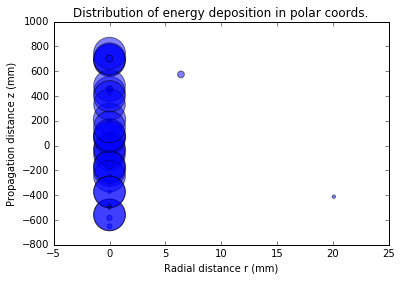

In [16]:
plt.scatter(r1, z1, s=en_ev, alpha=0.5)
plt.title('Distribution of energy deposition in polar coords.')
plt.xlabel('Radial distance r (mm)')
plt.ylabel('Propagation distance z (mm)')



(-1, 25)

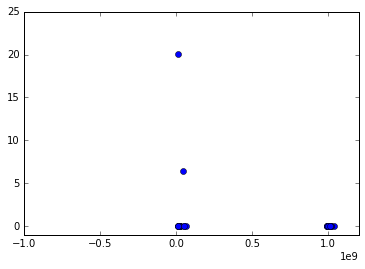

In [77]:
plt.plot(en_ev,r1,'o')
plt.xlim([-1.e9,1.2e9])
plt.ylim([-1,25])


Total number of e- generated: 2658.227729


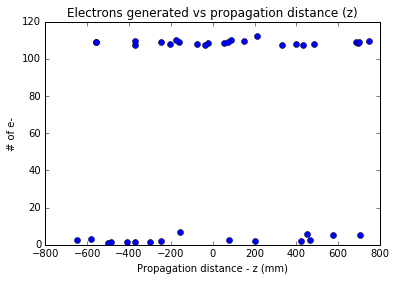

In [17]:
plt.plot(z1,elec_generated,'o')
plt.title('Electrons generated vs propagation distance (z)')
plt.ylabel('# of e-')
plt.xlabel('Propagation distance - z (mm)')
print "Total number of e- generated: " + str(elec_generated.sum())

In [18]:
graphlab.canvas.set_target('ipynb')
sf_energy_deposit['energy_deposit'] = sf_energy_deposit['energy_deposit']*1e6


In [19]:
sf_energy_deposit['energy_deposit'].show()

# 3D Plot

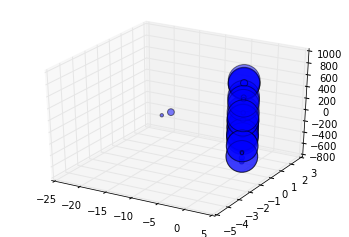

In [20]:
from mpl_toolkits.mplot3d import Axes3D
Cen3D = plt.figure(1)
Cen3D.clf()
ax = Cen3D.add_subplot(111, projection='3d')
ax.scatter(x1,y1,z1,cmap='hot',s=en_ev,alpha=0.5)


# Secondary electrons generated

In [21]:
sf_el = sf[sf['particle_name']=='e-']

In [22]:
sf_el['position_r'] = sf_el.apply(get_radial_value)
sf_el['num_e_gen'] = sf_el.apply(lambda x: return_num_electrons(x,'avg',4.1))
sf_el['kin_energy_from_vel'] = sf_el.apply(get_kinetic_energy_from_vel)
sf_el['energy_deposit']=sf_el['energy_deposit']*1e6 #convert to ev

In [23]:
el_resume = sf_el.groupby(key_columns='count_particle',
                        operations={'sum_energy_deposit': graphlab.aggregate.SUM('energy_deposit'),
                                       'num_steps':graphlab.aggregate.COUNT()})


In [24]:
sf_el.num_rows()

el_resume.sort('sum_energy_deposit',ascending=False)

count_particle,sum_energy_deposit,num_steps
28426,1036.11,2
89590,1018.0,2
595581,1014.56,2
259447,1012.89,2
992961,1009.41,2
828567,1008.62,2
147946,1007.03,2
741097,1006.93,2
592658,1005.98,2
152837,1005.28,2


In [25]:
el_resume['sum_energy_deposit'].show()

In [26]:
sf_el['kin_energy_from_vel']=sf_el['kin_energy_from_vel']*1e6 #convert to ev

In [27]:
sf_el

process_name,next_vol,mom_x,mom_dir_z,mom_dir_y,step_number,dE,particle_name,mom_dir_x
initStep,Abso,0,0,0,0,0.0,e-,0
Transportation,World,0,0,0,1,3.31e-06,e-,0
Transportation,OutOfWorld,0,0,0,2,3.37e-24,e-,0
initStep,Abso,0,0,0,0,0.0,e-,0
Transportation,World,0,0,0,1,4.18e-06,e-,0
Transportation,OutOfWorld,0,0,0,2,4.45e-24,e-,0
initStep,Abso,0,0,0,0,0.0,e-,0
Transportation,World,0,0,0,1,5.02e-06,e-,0
Transportation,OutOfWorld,0,0,0,2,5.24e-24,e-,0
initStep,Abso,0,0,0,0,0.0,e-,0


In [28]:
sf_el['kin_energy_from_vel'].show()

In [29]:
sf_el.num_rows()

3153

# Average energy loss by protons

In [30]:
protons = sf[sf['particle_name']=='proton']

In [31]:
protons.num_rows()

18001032

In [32]:
protons_resume = protons.groupby(key_columns='count_particle',
                        operations={'sum_energy_deposit': graphlab.aggregate.SUM('energy_deposit'),
                                       'num_steps':graphlab.aggregate.COUNT(),
                                   'sum_dE':graphlab.aggregate.SUM('dE')
                                   })

In [33]:
protons.column_names()

['process_name',
 'next_vol',
 'mom_x',
 'mom_dir_z',
 'mom_dir_y',
 'step_number',
 'dE',
 'particle_name',
 'mom_dir_x',
 'count_particle',
 'parent_id',
 'position_z',
 'total_energy',
 'position_x',
 'position_y',
 'velocity',
 'kinetic_energy',
 'track_id',
 'mom_y',
 'energy_deposit',
 'mom_z']

In [34]:
protons_resume['sum_dE'].show()

In [35]:
elec_generated.sum()

2658.2277289972899

# Questions Patric - 30.08

1 - Number of secondary particles generated

2 - Amount of energy lost by protons who generated electrons

3 - Plot energy loss as scatter (exact x,y position, whatever energy lost)

4 - Plot energy deposited by electrons

In [36]:
sf = graphlab.SFrame.read_csv(full_csv_path)    

Finished parsing file /Users/gabrielfior/data_mpp2/400GeV_15steps_full.csv

Parsing completed. Parsed 100 lines in 1.98879 secs.

Read 480146 lines. Lines per second: 213698

Read 2861602 lines. Lines per second: 367473

Read 5231389 lines. Lines per second: 391443

Read 7599625 lines. Lines per second: 402110

Read 9968151 lines. Lines per second: 407477

Read 12335863 lines. Lines per second: 412336

Read 14704594 lines. Lines per second: 414883

Read 17073575 lines. Lines per second: 416997

Finished parsing file /Users/gabrielfior/data_mpp2/400GeV_15steps_full.csv

Parsing completed. Parsed 18004185 lines in 42.4436 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,int,int,int,int,float,str,int,int,int,int,int,int,int,float,int,int,int,float,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


In [37]:
#el_resume = sf_el.groupby(key_columns='count_particle',
#                        operations={'sum_energy_deposit': graphlab.aggregate.SUM('energy_deposit'),
#                                       'num_steps':graphlab.aggregate.COUNT()})
sf['position_r'] = sf.apply(get_radial_value)
sf['num_e_gen'] = sf.apply(lambda x: return_num_electrons(x,'avg',4.1))
sf['kin_energy_from_vel'] = sf.apply(get_kinetic_energy_from_vel)
sf['energy_deposit_eV']=sf['energy_deposit']*1e6 #convert to ev

In [38]:
sf.column_names()

['process_name',
 'next_vol',
 'mom_x',
 'mom_dir_z',
 'mom_dir_y',
 'step_number',
 'dE',
 'particle_name',
 'mom_dir_x',
 'count_particle',
 'parent_id',
 'position_z',
 'total_energy',
 'position_x',
 'position_y',
 'velocity',
 'kinetic_energy',
 'track_id',
 'mom_y',
 'energy_deposit',
 'mom_z',
 'position_r',
 'num_e_gen',
 'kin_energy_from_vel',
 'energy_deposit_eV']

In [39]:
el_ids=sf[sf['particle_name']=='e-']['count_particle'].unique() #284571,15383

In [40]:
sf[sf['count_particle']==284570] #proton

process_name,next_vol,mom_x,mom_dir_z,mom_dir_y,step_number,dE,particle_name,mom_dir_x
initStep,World,0,1,0,0,0.0,proton,0
Transportation,Abso,0,1,0,1,5.92e-24,proton,0
Transportation,Abso,0,1,0,2,1.33e-06,proton,0
Transportation,Abso,0,1,0,3,1.33e-06,proton,0
Transportation,Abso,0,1,0,4,1.33e-06,proton,0
Transportation,Abso,0,1,7,5,1.33e-06,proton,-4
hIoni,Abso,0,1,7,6,1.64e-07,proton,-4
Transportation,Abso,0,1,7,7,1.16e-06,proton,-4
Transportation,Abso,0,1,7,8,1.33e-06,proton,-4
Transportation,Abso,0,1,7,9,1.33e-06,proton,-4


In [41]:
sf[sf['count_particle']==284571] # e-

Columns:
	process_name	str
	next_vol	str
	mom_x	int
	mom_dir_z	int
	mom_dir_y	int
	step_number	int
	dE	float
	particle_name	str
	mom_dir_x	int
	count_particle	int
	parent_id	int
	position_z	int
	total_energy	int
	position_x	int
	position_y	int
	velocity	float
	kinetic_energy	int
	track_id	int
	mom_y	int
	energy_deposit	float
	mom_z	int
	position_r	float
	num_e_gen	float
	kin_energy_from_vel	float
	energy_deposit_eV	float

Rows: Unknown

Data:
+----------------+------------+-------+-----------+-----------+-------------+
|  process_name  |  next_vol  | mom_x | mom_dir_z | mom_dir_y | step_number |
+----------------+------------+-------+-----------+-----------+-------------+
|    initStep    |    Abso    |   0   |     0     |     0     |      0      |
| Transportation |   World    |   0   |     0     |     0     |      1      |
| Transportation | OutOfWorld |   0   |     0     |     0     |      2      |
+----------------+------------+-------+-----------+-----------+-------------+
+----------+---------------+-----------+----------------+-----------+------------+
|    dE    | particle_name | mom_dir_x | count_particle | parent_id | position_z |
+----------+---------------+-----------+----------------+-----------+------------+
|   0.0    |       e-      |     0     |     284571     |     1     |    -338    |
| 9.14e-06 |       e-      |     0     |     284571     |     1     |    -337    |
| 1.2e-23  |       e-      |     0     |     284571     |     1     |    -336    |
+----------+---------------+-----------+----------------+-----------+------------+
+--------------+------------+------------+----------+----------------+----------+
| total_energy | position_x | position_y | velocity | kinetic_energy | track_id |
+--------------+------------+------------+----------+----------------+----------+
|      0       |     0      |     0      | 21.1947  |       0        |    2     |
|      0       |     11     |    -20     | 21.1189  |       0        |    2     |
|      0       |     13     |    -24     | 21.1189  |       0        |    2     |
+--------------+------------+------------+----------+----------------+----------+
+-------+----------------+-----+
| mom_y | energy_deposit | ... |
+-------+----------------+-----+
|   0   |  9.14148e-06   | ... |
|   0   |  1.19907e-23   | ... |
|   0   |      0.0       | ... |
+-------+----------------+-----+
[? rows x 25 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [42]:
# Energy deposited in ionization process
en_dep = sf[sf['process_name']=='hIoni']

In [43]:
(en_dep['dE']*1e6).show()

In [44]:
en_dep.head()

process_name,next_vol,mom_x,mom_dir_z,mom_dir_y,step_number,dE,particle_name,mom_dir_x,count_particle
hIoni,Abso,0,1,5,15,1.13e-06,proton,1,2317
hIoni,Abso,0,1,-1,12,1.28e-06,proton,3,4230
hIoni,Abso,0,1,7,4,1.22e-06,proton,-1,4465
hIoni,Abso,0,1,1,14,1.22e-06,proton,-1,4603
hIoni,Abso,0,1,-2,10,5.68e-07,proton,9,5876
hIoni,Abso,0,1,-1,9,9.57e-07,proton,9,6353
hIoni,Abso,0,1,-2,9,9.85e-07,proton,-2,6910
hIoni,Abso,0,1,7,11,1.09e-06,proton,4,7016
hIoni,Abso,0,1,6,3,4.01e-07,proton,6,7646
hIoni,Abso,0,1,-7,16,6.31e-07,proton,-6,7707


In [45]:
(sf_el[sf_el['step_number']==0]['kin_energy_from_vel']/1.e3).show()

In [46]:
low_energy = sf_el[(sf_el['kin_energy_from_vel']<=76397) & (sf_el['step_number']==0)]

In [47]:
low_energy['kin_energy_from_vel'].show()

In [48]:
x1 = np.array(sf_energy_deposit['position_x'])
y1 = np.array(sf_energy_deposit['position_y'])
z1 = np.array(sf_energy_deposit['position_z'])
r1 = np.array(sf_energy_deposit['position_r'])
en_ev = np.array(sf_energy_deposit['energy_deposit']*1e6) #eV
elec_generated = np.array(sf_energy_deposit['num_e_gen'])


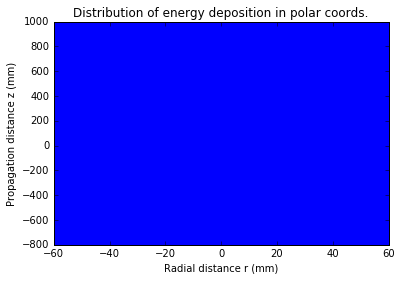

In [49]:
plt.scatter(r1, z1, s=en_ev, alpha=0.5)
plt.title('Distribution of energy deposition in polar coords.')
plt.xlabel('Radial distance r (mm)')
plt.ylabel('Propagation distance z (mm)')

# Defining centers of energy deposition 

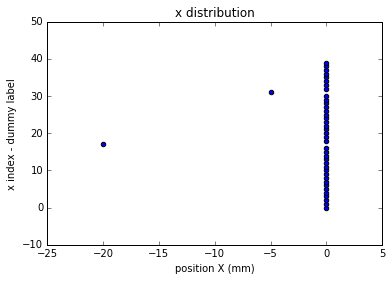

In [50]:
#Defining centers
plt.scatter(x1,range(len(x1)))
plt.title('x distribution')
plt.xlabel('position X (mm)')
plt.ylabel('x index - dummy label')

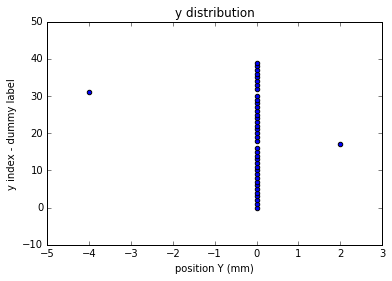

In [51]:
plt.scatter(y1,range(len(y1)))
plt.title('y distribution')
plt.xlabel('position Y (mm)')
plt.ylabel('y index - dummy label')

In [52]:
len(y1)

40

In [53]:
#Grouping energy lost by protons
p_resume = sf[sf['particle_name']=='proton'].groupby(key_columns='count_particle',
                        operations={'sum_energy_deposit': graphlab.aggregate.SUM('energy_deposit'),
                                    'sum_dE':graphlab.aggregate.SUM('dE'),
                                       'num_steps':graphlab.aggregate.COUNT()})

In [54]:
p_resume['sum_dE'].show()

In [55]:
sf[(sf['process_name']=='hIoni') & (sf['particle_name']=='proton')]['step_number'].max()

16

In [56]:
a = sf.groupby(key_columns='count_particle',
                        operations={'max_num_steps': graphlab.aggregate.MAX('step_number'),
                                    'process':graphlab.aggregate.CONCAT('process_name')
                            })

In [57]:
for i in a:
    if i['process'][-1] !="Transportation":
        print i['process'][-1]

In [58]:
hioni = sf[(sf['process_name']=='hIoni')]

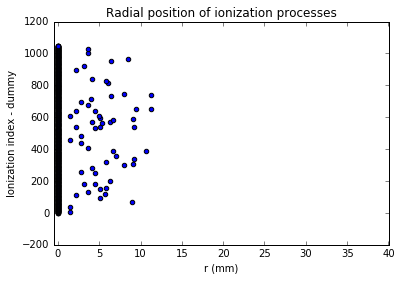

In [59]:
plt.scatter(hioni['position_r'],range(len(hioni['position_r'])))
plt.xlim([-0.5,40])
plt.title('Radial position of ionization processes')
plt.xlabel('r (mm)')
plt.ylabel('Ionization index - dummy')

In [60]:
lista=[]
for i in hioni:
    lista.append(hioni['count_particle'])


In [61]:
import collections
new_hioni = hioni.groupby(key_columns='count_particle',
                        operations={
                        'count1':graphlab.aggregate.COUNT()
    })

In [62]:
print [item for item, count in collections.Counter(lista).items() if count > 1]

[]


In [63]:
new_hioni.sort('count1',ascending=False) #398383	2 , 593776	2

count_particle,count1
398383,2
593776,2
193960,1
218014,1
606609,1
341920,1
641663,1
103048,1
522601,1
729765,1


In [64]:
a=sf[sf['count_particle']==398383]
b= sf[sf['count_particle']==593776]

In [65]:
for i in a:
    print i['step_number'],i['process_name'],i['position_r']

0 initStep 0.0
1 Transportation 0.0
2 Transportation 0.0
3 Transportation 0.0
4 Transportation 0.0
5 Transportation 0.0
6 Transportation 0.0
7 Transportation 0.0
8 Transportation 0.0
9 Transportation 0.0
10 Transportation 0.0
11 hIoni 0.0
12 hIoni 3.60555127546
13 Transportation 5.0
14 Transportation 7.07106781187
15 Transportation 3.16227766017
16 Transportation 5.09901951359
17 Transportation 6.0827625303
18 Transportation 8.24621125124
19 Transportation 2.0


In [66]:
for i in b:
    print i['step_number'],i['process_name'],i['position_r']

0 initStep 0.0
1 Transportation 0.0
2 hIoni 0.0
3 Transportation 2.2360679775
4 Transportation 2.2360679775
5 Transportation 4.472135955
6 Transportation 6.7082039325
7 Transportation 9.8488578018
8 Transportation 5.09901951359
9 Transportation 6.0827625303
10 Transportation 7.07106781187
11 Transportation 8.0622577483
12 hIoni 9.05538513814
13 Transportation 9.21954445729
14 Transportation 3.0
15 Transportation 4.0
16 Transportation 5.0
17 Transportation 6.0
18 Transportation 7.0
19 Transportation 8.0


# Investigating energy loss - 08.09

In [67]:
#Load csv again
sf = graphlab.SFrame.read_csv(full_csv_path) 

Finished parsing file /Users/gabrielfior/data_mpp2/400GeV_15steps_full.csv

Parsing completed. Parsed 100 lines in 3.40625 secs.

Read 480146 lines. Lines per second: 102779

Read 1913574 lines. Lines per second: 165036

Read 3335291 lines. Lines per second: 176581

Read 4283288 lines. Lines per second: 178470

Read 5231389 lines. Lines per second: 170920

Read 6178682 lines. Lines per second: 166187

Read 7126038 lines. Lines per second: 168463

Read 8072932 lines. Lines per second: 169661

Read 9494299 lines. Lines per second: 172516

Read 10915217 lines. Lines per second: 177004

Read 12335863 lines. Lines per second: 182514

Read 13757638 lines. Lines per second: 185070

Read 15178442 lines. Lines per second: 189747

Read 16599796 lines. Lines per second: 195175

Finished parsing file /Users/gabrielfior/data_mpp2/400GeV_15steps_full.csv

Parsing completed. Parsed 18004185 lines in 89.0903 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,int,int,int,int,float,str,int,int,int,int,int,int,int,float,int,int,int,float,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


In [68]:
el_resume['count_particle']

dtype: int
Rows: 1050
[284571, 15383, 686195, 960238, 737639, 717293, 827577, 521295, 886399, 507696, 185593, 753860, 272076, 384450, 757686, 72349, 315595, 595581, 95223, 232317, 291882, 166199, 110635, 590412, 617735, 472900, 885518, 193171, 769460, 854883, 628758, 590349, 791490, 867542, 623890, 330794, 308083, 395758, 446801, 754416, 585808, 866464, 475680, 527581, 968474, 901011, 404699, 383820, 237296, 564768, 976281, 564330, 484977, 975440, 973834, 873362, 790665, 643036, 858728, 608243, 679003, 685187, 835148, 395762, 883843, 719941, 387153, 802377, 83344, 855075, 554086, 922156, 428314, 746037, 970425, 419205, 873923, 283758, 815410, 998234, 736807, 94556, 658041, 998349, 259258, 460929, 843529, 6911, 232523, 891676, 946782, 338279, 135625, 227742, 21343, 314126, 313745, 315142, 460198, 435397, ... ]

In [69]:
sf[(sf['count_particle']==658040) & (sf['process_name']=='hIoni')]

Columns:
	process_name	str
	next_vol	str
	mom_x	int
	mom_dir_z	int
	mom_dir_y	int
	step_number	int
	dE	float
	particle_name	str
	mom_dir_x	int
	count_particle	int
	parent_id	int
	position_z	int
	total_energy	int
	position_x	int
	position_y	int
	velocity	float
	kinetic_energy	int
	track_id	int
	mom_y	int
	energy_deposit	float
	mom_z	int

Rows: Unknown

Data:
+--------------+----------+-------+-----------+-----------+-------------+
| process_name | next_vol | mom_x | mom_dir_z | mom_dir_y | step_number |
+--------------+----------+-------+-----------+-----------+-------------+
|    hIoni     |   Abso   |   0   |     1     |     -1    |      10     |
+--------------+----------+-------+-----------+-----------+-------------+
+----------+---------------+-----------+----------------+-----------+------------+
|    dE    | particle_name | mom_dir_x | count_particle | parent_id | position_z |
+----------+---------------+-----------+----------------+-----------+------------+
| 4.14e-07 |     proton    |     -8    |     658040     |     0     |     81     |
+----------+---------------+-----------+----------------+-----------+------------+
+--------------+------------+------------+----------+----------------+----------+
| total_energy | position_x | position_y | velocity | kinetic_energy | track_id |
+--------------+------------+------------+----------+----------------+----------+
|    400938    |     0      |     0      | 299.792  |     400000     |    1     |
+--------------+------------+------------+----------+----------------+----------+
+-------+----------------+-----+
| mom_y | energy_deposit | ... |
+-------+----------------+-----+
|   0   |  9.12591e-07   | ... |
+-------+----------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [70]:
get_kinetic_energy_from_vel(sf[(sf['count_particle']==658041)][0])*1.0e6

3901.4179705567408

In [71]:
sf[sf['count_particle']==0]

Columns:
	process_name	str
	next_vol	str
	mom_x	int
	mom_dir_z	int
	mom_dir_y	int
	step_number	int
	dE	float
	particle_name	str
	mom_dir_x	int
	count_particle	int
	parent_id	int
	position_z	int
	total_energy	int
	position_x	int
	position_y	int
	velocity	float
	kinetic_energy	int
	track_id	int
	mom_y	int
	energy_deposit	float
	mom_z	int

Rows: Unknown

Data:
	[]

In [78]:
protons_resume.head

<bound method SFrame.head of Columns:
	count_particle	int
	sum_dE	float
	sum_energy_deposit	float
	num_steps	int

Rows: 999999

Data:
+----------------+-----------+--------------------+-----------+
| count_particle |   sum_dE  | sum_energy_deposit | num_steps |
+----------------+-----------+--------------------+-----------+
|     368497     | 1.995e-05 |    1.99044e-05     |     18    |
|     846413     | 1.995e-05 |    1.99044e-05     |     18    |
|     251434     | 1.995e-05 |    1.99044e-05     |     18    |
|     504649     | 1.995e-05 |    1.99044e-05     |     18    |
|     765931     | 1.995e-05 |    1.99044e-05     |     18    |
|     588617     | 1.995e-05 |    1.99044e-05     |     18    |
|     879592     | 1.995e-05 |    1.99044e-05     |     18    |
|     211023     | 1.995e-05 |    1.99044e-05     |     18    |
|     439655     | 1.995e-05 |    1.99044e-05     |     18    |
|     893826     | 1.995e-05 |    1.99044e-05     |     18    |
+----------------+-----------+----

In [79]:
sf

<bound method SFrame.num_rows of Columns:
	process_name	str
	next_vol	str
	mom_x	int
	mom_dir_z	int
	mom_dir_y	int
	step_number	int
	dE	float
	particle_name	str
	mom_dir_x	int
	count_particle	int
	parent_id	int
	position_z	int
	total_energy	int
	position_x	int
	position_y	int
	velocity	float
	kinetic_energy	int
	track_id	int
	mom_y	int
	energy_deposit	float
	mom_z	int

Rows: 18004185

Data:
+----------------+----------+-------+-----------+-----------+-------------+
|  process_name  | next_vol | mom_x | mom_dir_z | mom_dir_y | step_number |
+----------------+----------+-------+-----------+-----------+-------------+
|    initStep    |  World   |   0   |     1     |     0     |      0      |
| Transportation |   Abso   |   0   |     1     |     0     |      1      |
| Transportation |   Abso   |   0   |     1     |     0     |      2      |
| Transportation |   Abso   |   0   |     1     |     0     |      3      |
| Transportation |   Abso   |   0   |     1     |     0     |      4      

In [80]:
sf['position_r'] = sf.apply(get_radial_value)

In [83]:
sf_resumed = sf['energy_deposit','position_r']

In [ ]:
sf_resumed.showw()